<a href="https://colab.research.google.com/github/VladTeapa/Python/blob/master/Lab_5_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN
In acest laborator se vor continua experimentele privind invatarea nesupervizata. Algoritmul folosit de aceasta data este [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN). 


DBSCAN (Density-based spatial clustering of applications with noise) este un algoritm de clusterizare bazat pe densitatea regiunilor de puncte. Vecinatatea unui punct $p$ se defineste ca multimea punctelor aflate la o distanta cel mult $\epsilon$ de acest punct. Densitatea in jurul unui punct $p$ se defineste ca numarul de puncte din vecinatatea acestuia. Algoritmul functioneaza astfel:


1.   Se primesc ca si argumente de intrare doua numere naturale: $\epsilon$ si $minPoints$
2.   Se alege primul punct nevizitat si se calculeaza vecinatatea acestuia
3.   Daca in aceasta vecinatatea exista un numar mai mare se egal cu $minPoints$ de puncte, atunci vecinatatea va forma un cluster. In caz contrar, punctul este considerat outlier.
4.   Se alege un punct din vecinatatea creata sau urmatorul punct nevizitat si se revine la pasul 2.
5.   Se continua pana se viziteaza toate punctele.






O simulare vizuala se gaseste [aici](https://www.youtube.com/watch?v=h53WMIImUuc). Se incepe prin a instalata dependinte si a importa librariile necesare.

In [54]:
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (148 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 133.1MB 69kB/s 
     |████████████████████████████████| 10.4MB 2.8MB/s 
     |████████████████████████████████| 225kB 51.6MB/s 
  Created wh

In [0]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import tensorflow_datasets as tfds
import tensorflow as tf
import csv
import pandas as pd
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
#tf.enable_eager_execution()
%matplotlib inline


##Clusterizare blob-urilor 

Ca si in laboratorul trecut, se genereaza un set de puncte random folosind functia *make_blobs*.

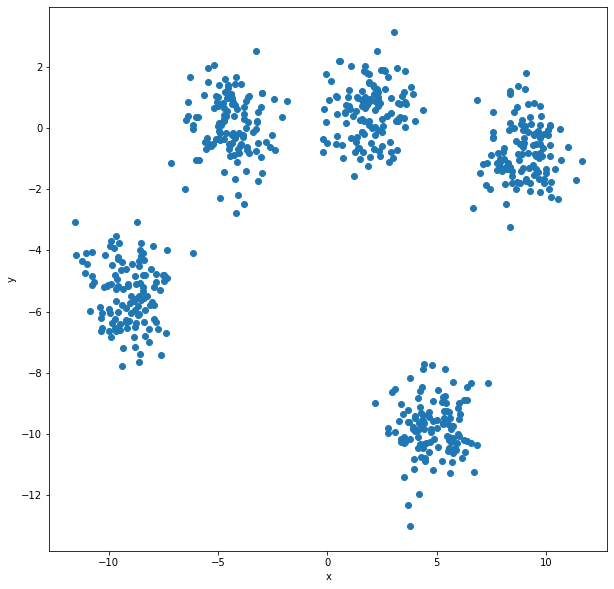

In [2]:
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Pentru a lucra mai usor cu DBSCAN, datele generate sunt standardizate. Pentru aceasta se ifoloseste functia *fit_transform* din clasa StandardScaler definita in libraria sklearn. 

In [0]:
X_scaled = StandardScaler().fit_transform(X)


Asemanator cu kmeans, se instantiaza un obiect de tipul DBSCAN. La initializarea obiectului se transmit cei doi paramterii ai algoritmului. Se apeleaza apoi functia fit_predict aferenta acestui obiect pentru a obtine clusterizarea.

In [4]:
dbscan = DBSCAN(eps=0.2, min_samples = 4)
clusters = dbscan.fit_predict(X_scaled)
print(clusters)

[ 0  1  2  1  1  0  1  3  1  4  0  4  2  4  2  2  3  3  4  1  0  3  2  2
  3  4  2  1  3  4  0  1  0  2  2  1  1  2  3  4  1  0  3  2  4  3  1  1
  3  2  3  2  3  1  0  1  4  0  4  1  1  4  4  0  1  4  4  4  0  0  2  3
  1  2  0  0  2  2  0  4  0  1  0  1  0  3  1  0  3  4  4  2  3  1  1  3
  1  3  1  3  1  0  3  3  1  2  4  2  1  3  4  3  3  3  3  3  2  0  3  0
  1  2  2  4  4  1  0  2  3  2  3  2  3  3  4  3  2  0  4  3  0  3  2  4
  2  3  1  1  2  2  1  4  1  4  2  3  2  4  0  1  4  3  0  3  1  2  2  3
  0  2  0  0  3 -1  0  1  2  3  0  0  1  3  0  3  0  1  4  3  0  0  3  1
 -1  1  0  0  0  0  2  0  0  3  2  0  3  3  4  4  3  4  4  2  2  3  4  1
  0  4  3  4  3  0  0  1  3  4  3  2  2  3  2  0  1  2  0  0  4  4  3  2
  0  2  4  4  2  4  1  4  4  1  1  4  2  0  1  1  0  0  1  1  4  0 -1  1
  4  2  0  3  2  0  4  2  4  3  2  0  3 -1  4  0  2  1  2  2  2  0  3  4
  2  3  1  1  1  2  1  3  1  3  0  1  4  3  4  4  1  1  4  1  1  4  4  4
  3  1  1  0  0  4  1  0  1  2  1  1  3  2  1  3  3

Mai jos se vizualizeaza clusterele create.

Text(0, 0.5, 'Y')

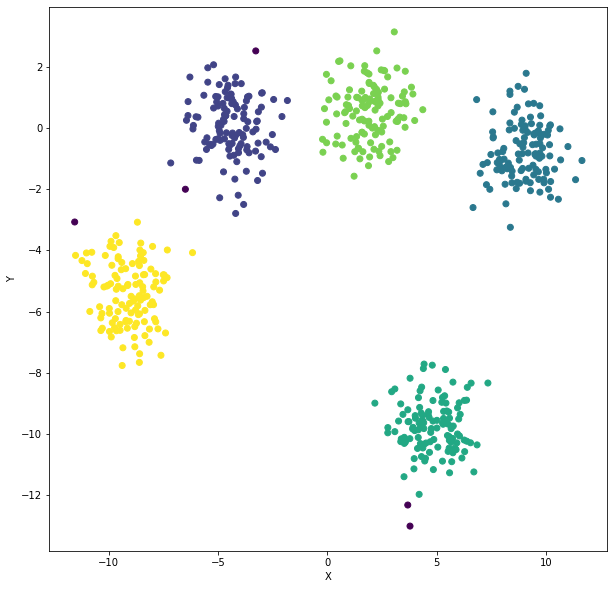

In [6]:
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")
plt.xlabel("X")
plt.ylabel("Y")

**TODO:** Experimentati cu cei doi parametrii ai algoritmului. Ce observati?

Folosind kmeans, se obtine urmatoare clusterizare:

Text(0, 0.5, 'Y')

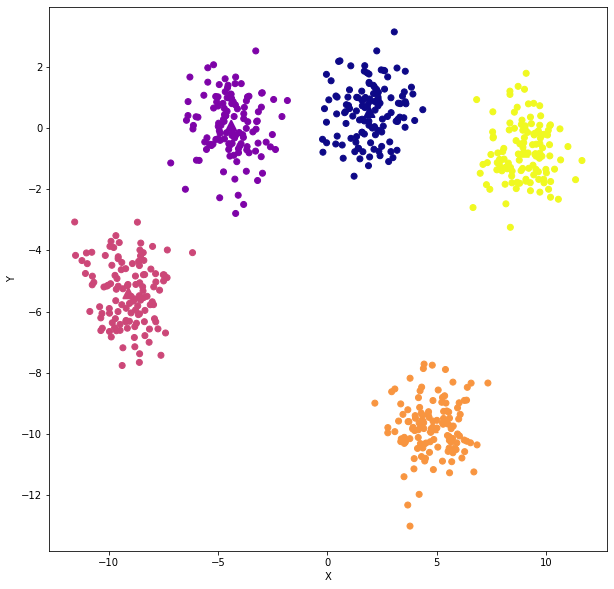

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("X")
plt.ylabel("Y")

Pentru a sesiza diferenta dintre cei doi algoritmi, se va modifica forma datelor originale. Pentru aceasta, fiecarui punct i se aplica o transformare generata de o distibutie normala.

In [9]:
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
print(transformation)
X = np.dot(X, transformation)

[[ 0.60834549 -0.63667341]
 [-0.40887718  0.85253229]]


Intuitiv, aplicand aceasta transformare fiecarui punct, clusterele sunt "alungite" dupa cum se observa mai jos

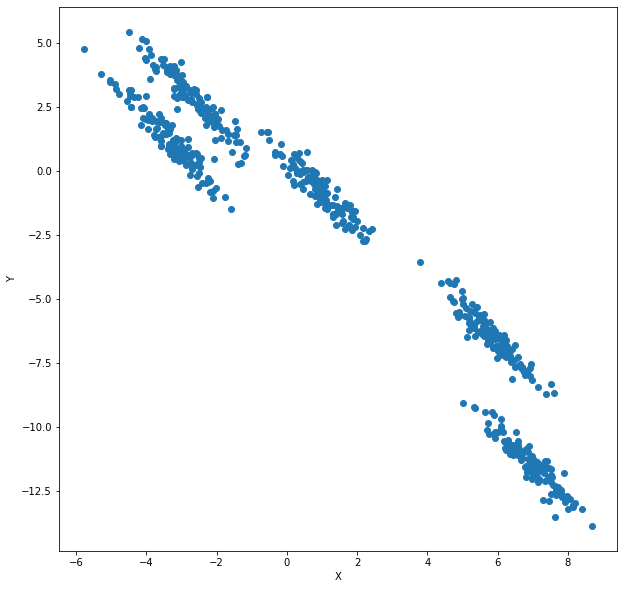

In [10]:
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**TODO: ** Aplicati DBSCAN si Kmeans pe setul de date modificat. Pentru DBSCAN, standardizati datele.

Text(0, 0.5, 'Y')

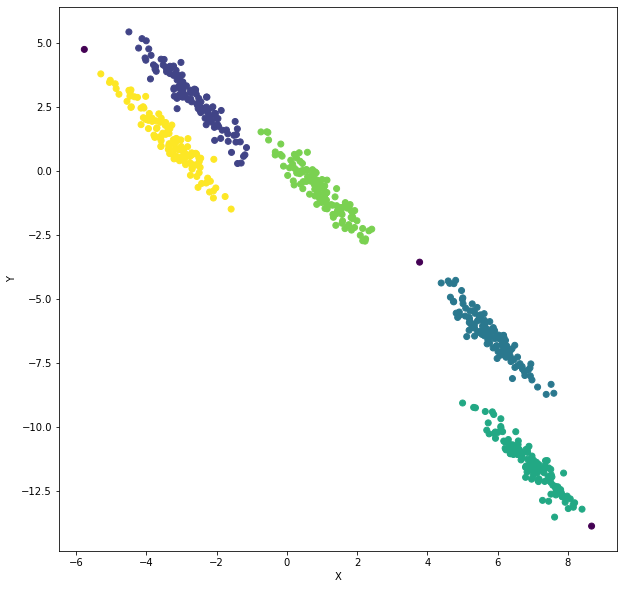

In [11]:
#DBSCAN
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

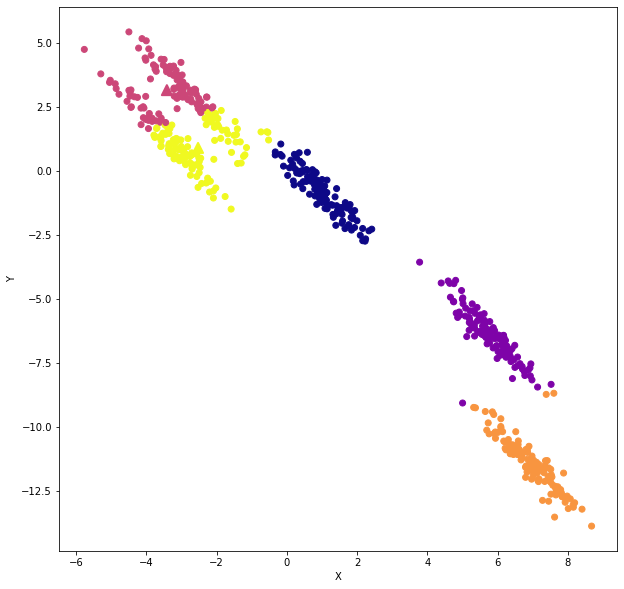

In [16]:
#KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("X")
plt.ylabel("Y")

Explicati rezultatele obtinute. De ce clusterizarea folosind DBSCAN este vizual mai eficienta decat Kmeans?

##Clusterizarea datelor "circulare"
In acest experiment se va considera un set de date circulare. Pentru generare se va folosi functia [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). Parametrii importanti ai acestei functii sunt urmatorii:


*   n_samples: numarul de puncte
*   noise: cantitatea de zgomot 
*   factor: distanta dintre cercuri 





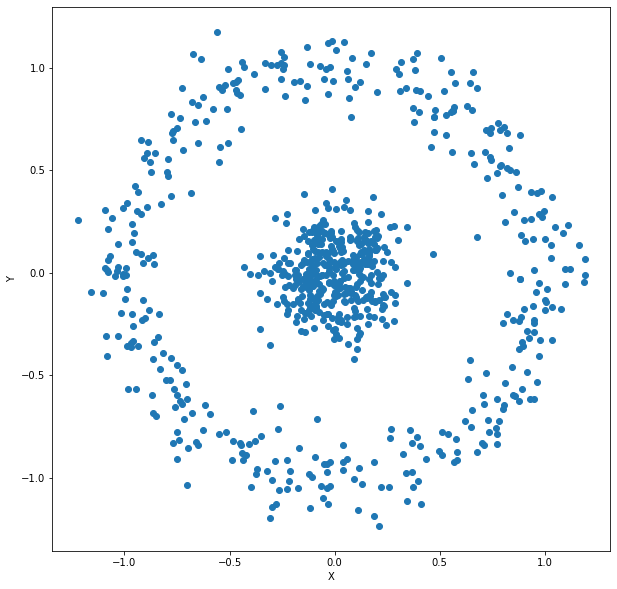

In [17]:
X, y = make_circles(random_state=170, n_samples=800, noise = 0.1, factor = 0.15)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Aplicand algoritmul kmeans pe datele de mai sus obtinem urmatoarea clusterizare

ValueError: ignored

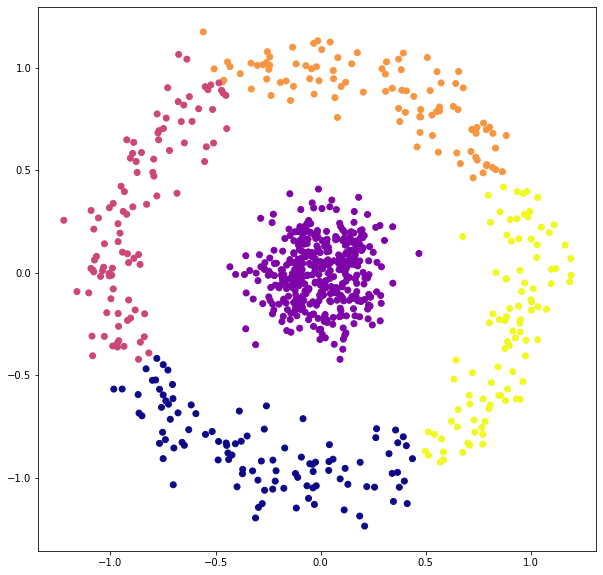

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**TODO:** Aplicati algoritmul DBSCAN pentru datele de mai sus. Standardizati datele inainte.

Text(0, 0.5, 'Y')

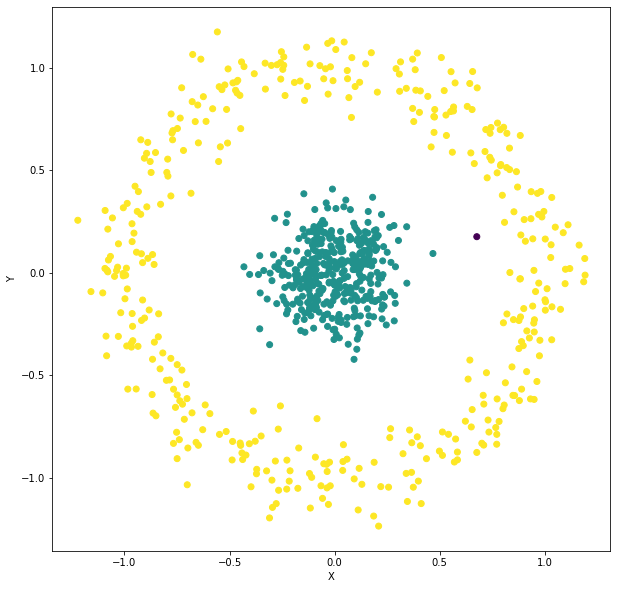

In [43]:
X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.4, min_samples = 15)
clusters = dbscan.fit_predict(X_scaled)
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")
plt.xlabel("X")
plt.ylabel("Y")

**TODO:** Experimentati diversi parametrii pentru cei doi algoritmi. Ce observati?

##Clusterizarea statiilor meteo
In urmatoarea serie de exeprimente se va studia cum poate fi aplicat algoritmul DBSCAN pe un set de date real. Setul de date contine informatii cu privire la 1341 statii meteo. Printe aceste informatii se numara pozitia pe glob, temperatura medie inregistrata, temperatur minima si temperatura maxima. Toate datele cu privire la o statie meteo sunt descrise in tabelul de mai jos.

<h4 align = "center">
Vremea in Canada
   
Valori Iulie 2015 
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

Setul de date se descarca de la adresa de mai jos in format CSV.

In [44]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-04-13 11:10:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.06s   

2020-04-13 11:10:31 (2.01 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



Pentru a manipula astfel de date, se foloseste libraria [pandas](https://pandas.pydata.org/). Aceasta este una dintre cele mai folosite librarii pentru procesarea datelor, prima etapa in orice task de machine learning. Mai jos se foloseste functia *read_csv* pentru citirea fisierului descarcat anterior.

In [0]:
filename='weather-stations20140101-20141231.csv'
pdf = pd.read_csv(filename)

Pentru a afisa primele 10 inregistrari se foloseste functia *head*:

In [46]:
pdf.head(10)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
6,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,7.0,0.0,7.0,NaN,110.0,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
7,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,0.0,NaN,NaN,NaN,108.8,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
8,METCHOSIN,48.374,-123.561,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,102.6,0.0,95.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,1015105
9,NORTH COWICHAN,48.824,-123.718,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,142.8,0.0,114.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,1015628


Dupa cum se poate observa, exista coloane cu valori NaN. Pentru a obtine o statistica exacta cu numarul de inregistrari nenule (care pot fi folosite) de pe fiecare coloana se foloseste functia *count*:

In [47]:
pdf.count()

Stn_Name    1341
Lat         1341
Long        1341
Prov        1341
Tm          1256
DwTm        1256
D            357
Tx          1260
DwTx        1260
Tn          1260
DwTn        1260
S            586
DwS          586
S%N          198
P           1227
DwP         1227
P%N          209
S_G          798
Pd          1227
BS             0
DwBS           0
BS%            0
HDD         1256
CDD         1256
Stn_No      1341
dtype: int64

Pentru inceput, se vor elimina toate inregistrarile care contin valori nule pe coloana Tm (temperatura medie). Se procedeaza ca mai jos:

In [48]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


Pentru a plota pozitiile statiilor meteo pe o harta reala se va folosi libraria [Basemap](https://matplotlib.org/basemap/). Aceasta e o librarie folosita in plotarea imaginilor geografice.

Mai jos sunt definite limitele geografice ale hartii ce va fi afisata (latitudine si longitudine). Se extrag din pdf doar datele despre acele statii care se gasesc in limitele specificate:

In [0]:
llon=-140
ulon=-50
llat=40
ulat=65
pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

Se creaza apoi un obiect de tipul Basemap. La initializare se transmit proprietatiile hartii. In cazul de fata se foloseste [proiectia Mercator](https://matplotlib.org/basemap/users/merc.html). Lista competa de parametrii se gaseste [aici](https://matplotlib.org/basemap/api/basemap_api.html). Pentru aceasta aplicatie, vor fi folositi urmatorii parametrii:


*   projection - tipul de proiectie (in cazul de fata se alege 'merc')
*   resolution - rezolutia (in cazul de fata se alege low 'l')
*   area_thresh - lacurile sau suprafetele de tip litoral cu o arie mai mica decat pragul specificat nu vor fi afisate




In [0]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

Functiile folosite pentru desenul propriu-zis sunt descrise [aici](https://matplotlib.org/basemap/users/geography.html). Pentru aceasta aplicatie sunt folosite urmatoarele functii:


*   drawcoastlines - deseneaza suprafetele litoral
*   drawcountries - deseneaza tarile 
*   fillcontinents - coloreaza interiorul continentelor
*   shadedrelief - deseneaza relieful





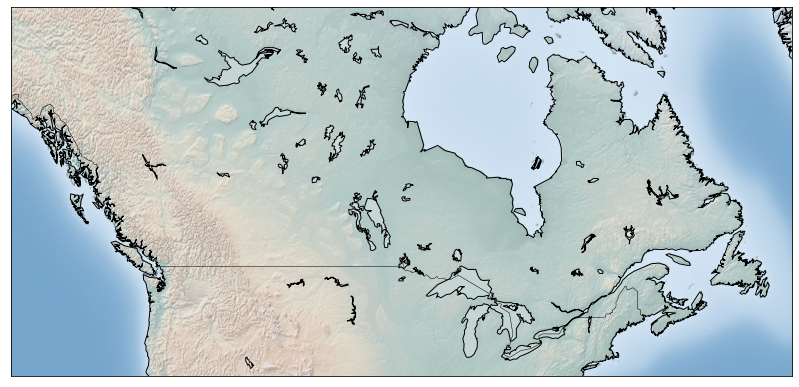

In [58]:
rcParams['figure.figsize'] = (14,10)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

Afisarea statiilor meteo ca puncte, se face extragnd coordonatele acestora si folosind functia *plot* aferenta obiectului Basemap:

In [0]:
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist() #conversie 
pdf['ym'] =ys.tolist()

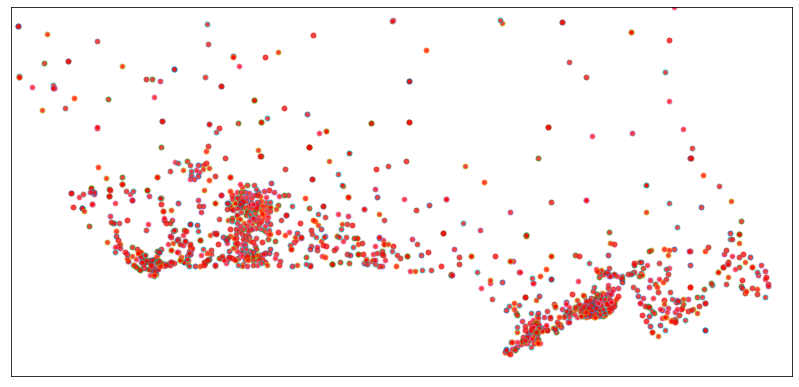

In [63]:
for index,row in pdf.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()


Mai jos se afiseaza pozitiile statiilor meteo suprapuse peste harta completa:

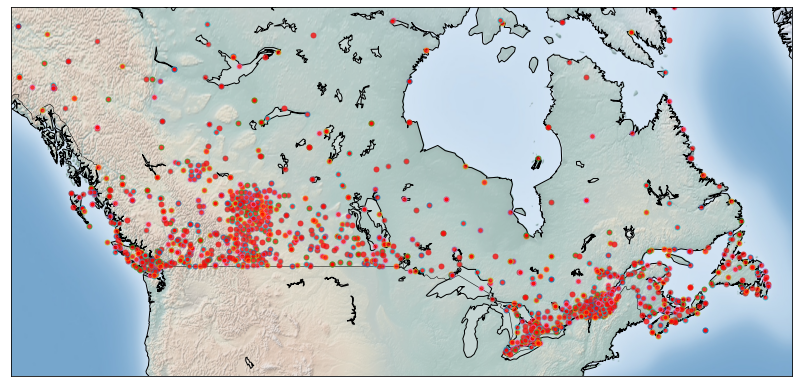

In [64]:
rcParams['figure.figsize'] = (14,10)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
for index,row in pdf.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

##Clusterizarea in functie de pozitie
In primul experiment, statiile meteo vor fi clusteizate dupa pozitia acestora. Mai jos, se extrag pozitiile pentru fiecare statie din setul de date si se standardizeaza:

In [0]:
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

Functia *nan_to_num* inlocuieste valorile de NaN cu 0.

Se aplica DBSCAN pe datele reprezentand pozitiile statiilor. In tabelul cu date, se creaza coloana Clus_Db reprezentand eticheta asignata de algoritm unuei anumite statii:

In [70]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
labels = db.labels_
#kmeans = KMeans(n_clusters=5)
#kmeans.fit(pdf[['xm','ym']])
#y_pred = kmeans.predict(X)
#labels= kmeans.labels_
pdf["Clus_Db"]=labels
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Se afiseaza harta cu statiile meteo insa de aceasta data punctele vor fi colorate corespunzator cu clusterul de care apartin:

Cluster 0, Avg Temp: 1.892430278884463
Cluster 1, Avg Temp: -16.955445544554454
Cluster 2, Avg Temp: -9.740705128205128
Cluster 3, Avg Temp: -14.011111111111104
Cluster 4, Avg Temp: -20.962937062937062


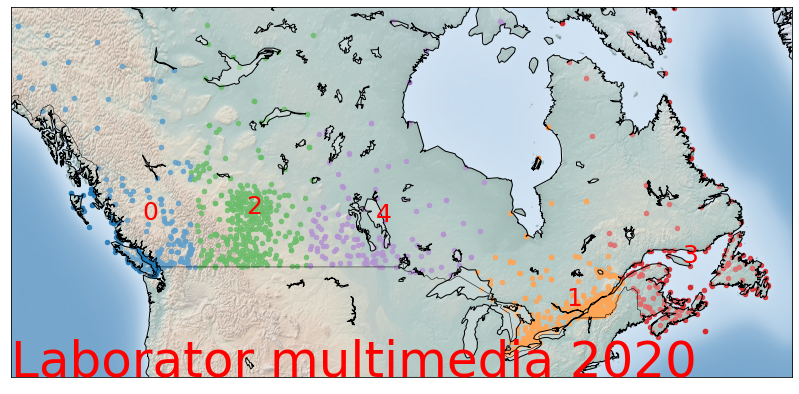

In [73]:
rcParams['figure.figsize'] = (14,10)
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
plt.text(50,50,'Laborator multimedia 2020', fontsize=50, color='red',)
for clust_number in set(labels):
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

Pentru a desena numarul clusterului s-a folosit functia *plt.text*. Aceasta a primit ca argumente pozitia unde trebuie desenata cifra si cifra in sine (str(clust_number))

**TODO:** Clusterizati statiile in mod asemanator dupa pozitie, temperatura maxima, temperatura minima si temperatura medie.

Cluster 0, Avg Temp: 6.2211920529801334
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882355
Cluster 3, Avg Temp: -13.877209302325586
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398482
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


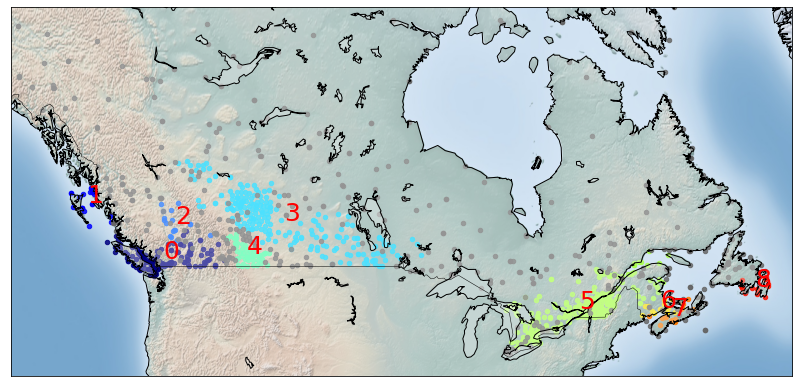

In [69]:
#######Calcul#######
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
#######Afisare#######
rcParams['figure.figsize'] = (14,10)
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))
